# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1141.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.62e-43
Time:                        15:12:15   Log-Likelihood:                 6.8018
No. Observations:                  50   AIC:                            -5.604
Df Residuals:                      46   BIC:                             2.045
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0668      0.075     67.514      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.59384518  5.02528467  5.42435883  5.76928805  6.04615288  6.25118091
  6.39136665  6.48332225  6.55054825  6.61957248  6.71559162  6.85833142
  7.05880586  7.31750759  7.62432694  7.96021294  8.30030335  8.61800945
  8.88938446  9.09705798  9.23308985  9.30027474  9.31168294  9.28851302
  9.25660889  9.24221376  9.26765845  9.34769251  9.48706088  9.67972434
  9.90985171 10.15442089 10.38700133 10.58209646 10.71933275 10.78680698
 10.78304194 10.71722912 10.60771855 10.47900398 10.35769862 10.26816263
 10.22850085 10.24758823 10.32361165 10.44436789 10.58926851 10.73272251
 10.84834086 10.91327214]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.90173398 10.78320228 10.57334912 10.30788916 10.03383545  9.79798901
  9.63548031  9.56116808  9.5660014   9.61923568]


## Plot comparison

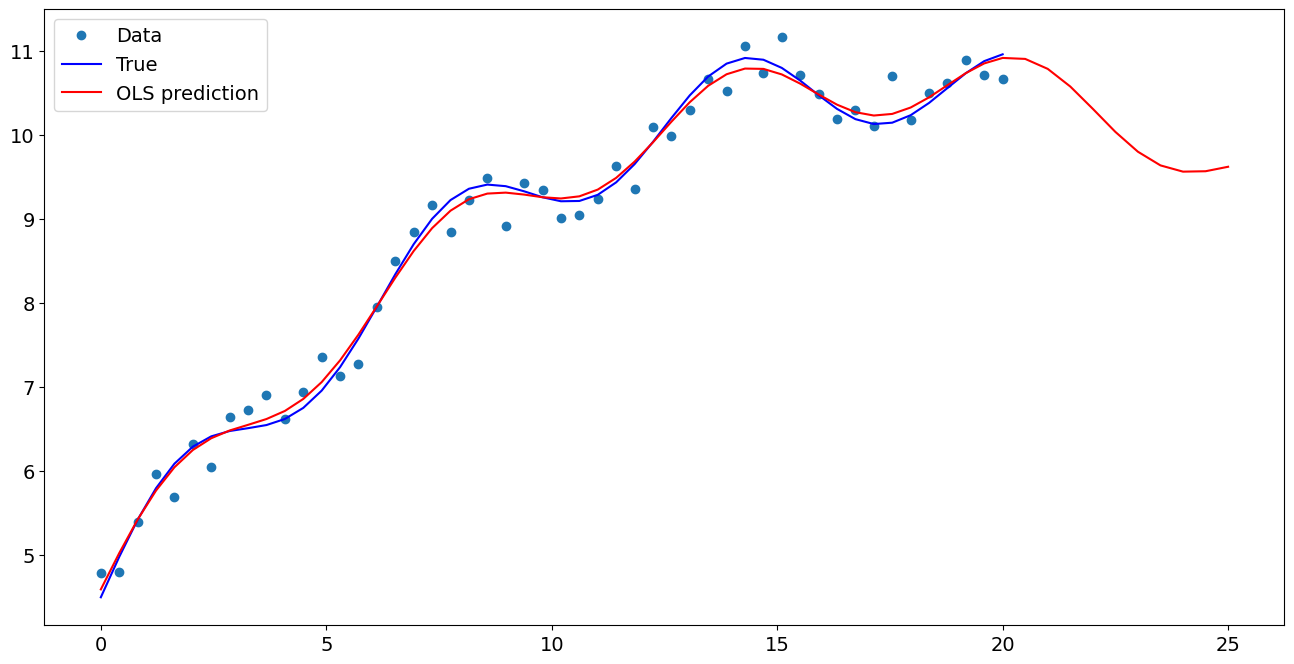

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.066835
x1                  0.486925
np.sin(x1)          0.399632
I((x1 - 5) ** 2)   -0.018920
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.901734
1    10.783202
2    10.573349
3    10.307889
4    10.033835
5     9.797989
6     9.635480
7     9.561168
8     9.566001
9     9.619236
dtype: float64